In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r'/Users/markclampitt/Documents/Springboard/Story_Telling_Assn/Online Retail - Copy.csv')

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df.shape

(541909, 8)

In [15]:
df['InvoiceNo'].value_counts().count()

25900

In [ ]:
#25,900 unque invoice numbers

In [16]:
df['CustomerID'].value_counts().count()

4372

In [ ]:
#4,372 unique customers

In [17]:
df['Description'].value_counts().count()

4223

In [18]:
df['InvoiceDate'].min()

'1/10/11 10:04'

In [19]:
df['InvoiceDate'].max()

'9/9/11 9:52'

In [20]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [21]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [22]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [23]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [74]:
Country_Count_df = pd.DataFrame(df['Country'].value_counts())

In [83]:
Country_Count_df = Country_Count_df[0:11]

In [84]:
Country_Count_df.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway'],
      dtype='object')

<BarContainer object of 11 artists>

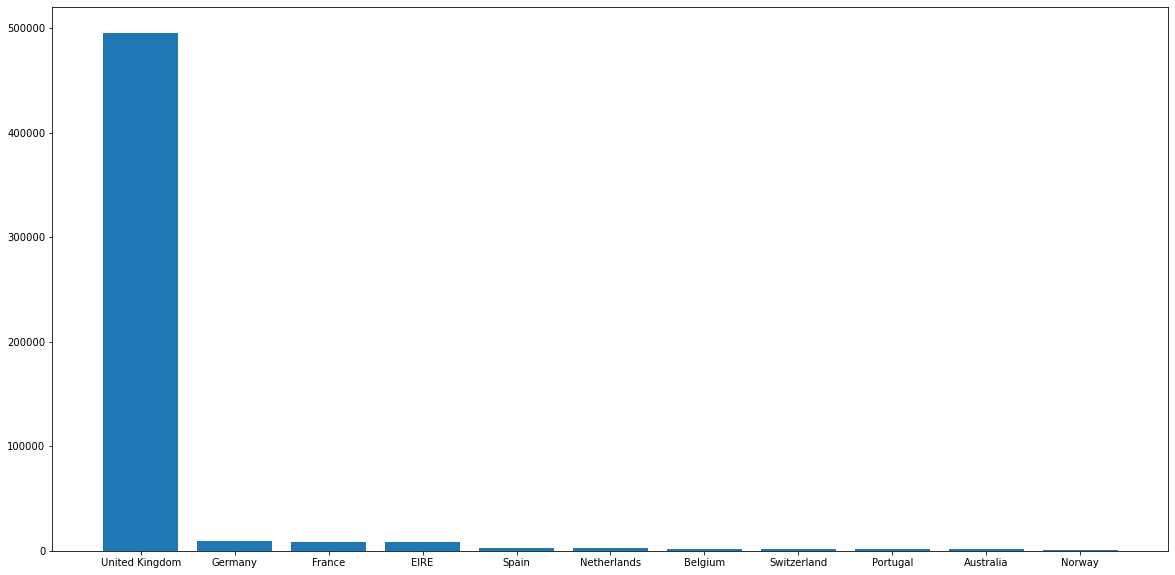

In [95]:
plt.figure(figsize=(20,10)) 


plt.bar(Country_Count_df.index, height = Country_Count_df['Country'] )

In [98]:
Product_df = pd.DataFrame(df['Description'].value_counts().head(10))

In [99]:
Product_df

,Description
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1473
PACK OF 72 RETROSPOT CAKE CASES,1385
LUNCH BAG BLACK SKULL.,1350
NATURAL SLATE HEART CHALKBOARD,1280


<BarContainer object of 10 artists>

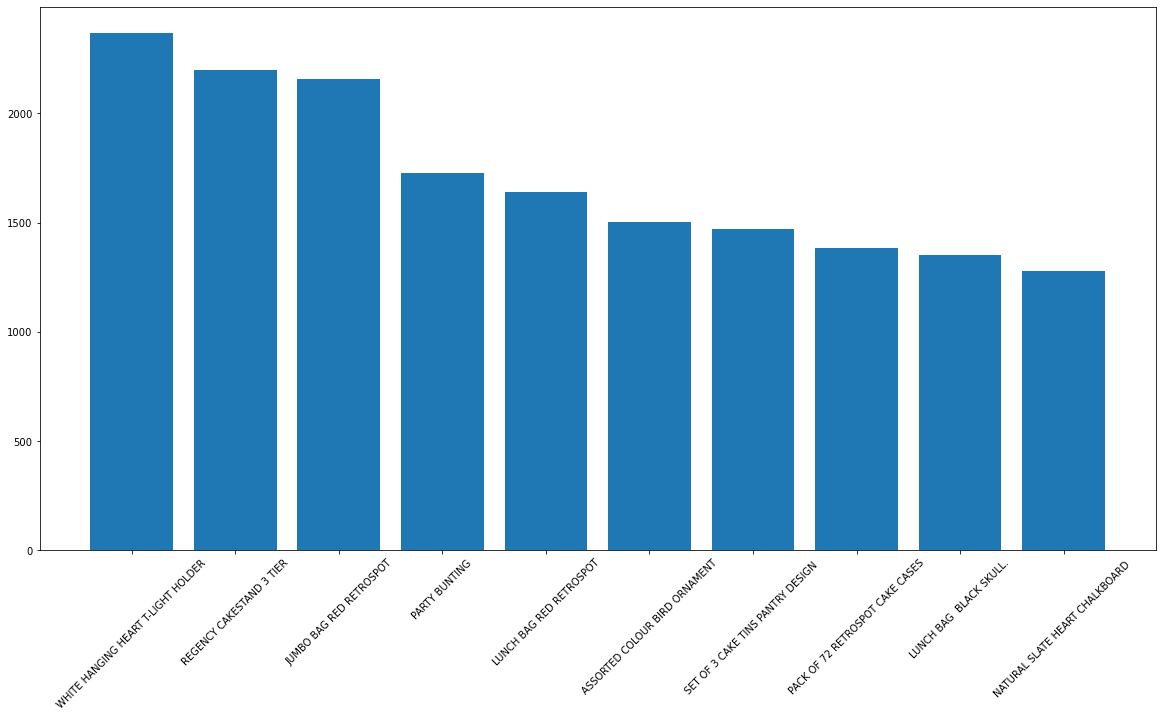

In [103]:
plt.figure(figsize=(20,10)) 
plt.xticks(rotation=45)

plt.bar(Product_df.index, height = Product_df['Description'] )

In [105]:
df['CustomerID'].value_counts().mean()

93.05329368709972

In [106]:
df['CustomerID'].value_counts().max()

7983

In [107]:
df['CustomerID'].value_counts().min()

1

In [109]:
Customer_graphs = pd.DataFrame(df['CustomerID'].value_counts())

In [110]:
Customer_graphs.head()

,CustomerID
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782


In [112]:
Cusomter_Purchases_List =[Customer_graphs['CustomerID']]

In [113]:
Cusomter_Purchases_List

[17841.0    7983
 14911.0    5903
 14096.0    5128
 12748.0    4642
 14606.0    2782
            ... 
 15070.0       1
 15753.0       1
 17065.0       1
 16881.0       1
 16995.0       1
 Name: CustomerID, Length: 4372, dtype: int64]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe95dbbae80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe95dbc5580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe95dbbab20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe95dbc5c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe95dbc5fa0>],
 'means': []}

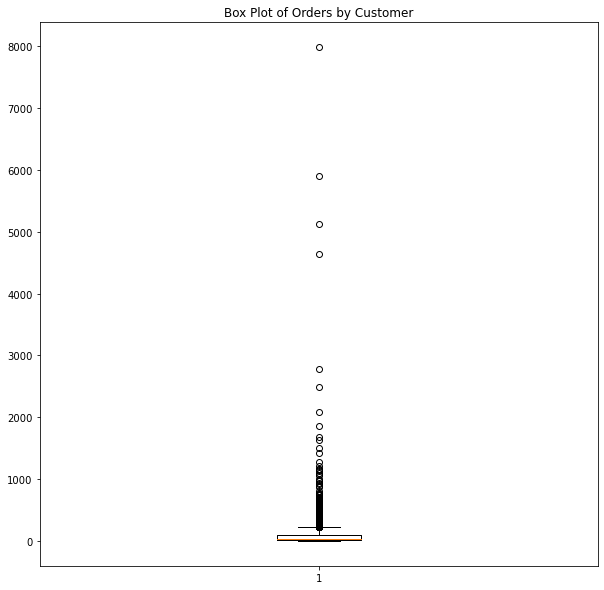

In [124]:
fig1, ax1 = plt.subplots(figsize = (10,10))

ax1.set_title('Box Plot of Orders by Customer')
ax1.boxplot(Cusomter_Purchases_List)


In [123]:
Customer_graphs['CustomerID'].mean()

93.05329368709972

In [129]:
for i in Cusomter_Purchases_List:
    if i > 1000:
        Cusomter_Purchases_List.append(i)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [130]:
Customer_graphs.describe()

,CustomerID
count,4372.000000
mean,93.053294
std,232.471608
min,1.000000
25%,17.000000
50%,42.000000
75%,102.000000
max,7983.000000


In [131]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [132]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: InvoiceDate, dtype: object

In [138]:
Invoices_by_date = pd.DataFrame(df[['InvoiceNo','InvoiceDate']].groupby('InvoiceDate').count())

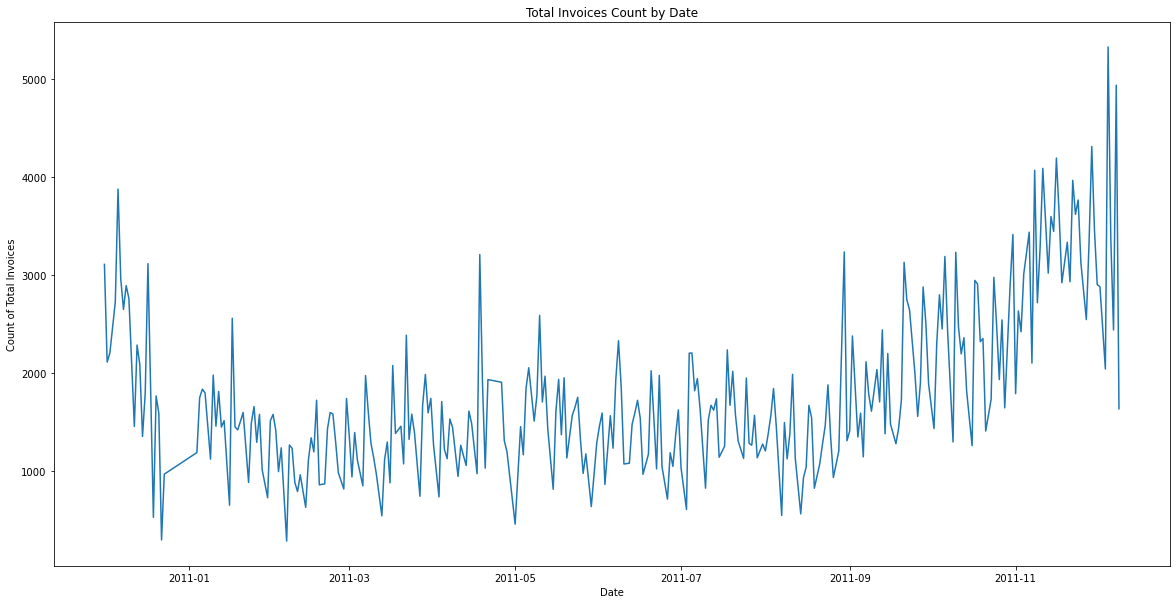

In [144]:
plt.figure(figsize=(20,10)) 

plt.plot(Invoices_by_date.index,Invoices_by_date['InvoiceNo'])
plt.title('Total Invoices Count by Date')
plt.xlabel('Date')
plt.ylabel('Count of Total Invoices')
plt.show()

In [148]:
df['Total Price'] = df['UnitPrice'] * df['Quantity']

In [151]:
Total_Price_df = pd.DataFrame(df[['InvoiceNo','Total Price']].groupby('InvoiceNo').sum())

In [ ]:
Total_Price_df

In [152]:
Total_Price_df['Total Price'].describe()

count     25900.000000
mean        376.360924
std        2013.261050
min     -168469.600000
25%          11.775000
50%         207.535000
75%         409.085000
max      168469.600000
Name: Total Price, dtype: float64

In [156]:
Returns = Total_Price_df[Total_Price_df['Total Price'] < 0]

In [155]:
Sales = Total_Price_df[Total_Price_df['Total Price'] > 0]

In [157]:
Sales 

,Total Price
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
...,...
581584,140.64
581585,329.05
581586,339.20


In [159]:
Sales['Total Price'].mean()

534.4030332665359

In [160]:
Sales['Total Price'].describe()

count     19960.000000
mean        534.403033
std        1780.487648
min           0.380000
25%         152.510000
50%         303.835000
75%         495.615000
max      168469.600000
Name: Total Price, dtype: float64

In [161]:
Returns['Total Price'].describe()

count      3838.000000
mean       -239.431113
std        3206.470580
min     -168469.600000
25%         -41.600000
50%         -16.850000
75%          -7.950000
max          -0.390000
Name: Total Price, dtype: float64

In [165]:
Total_Price_Quantity_df = pd.DataFrame(df[['InvoiceNo','Total Price','Quantity']].groupby('InvoiceNo').sum('Quantity'))

In [171]:
Total_Price_Quantity_df[Total_Price_Quantity_df['Total Price'] > 0].describe()

,Total Price,Quantity
count,19960.000000,19960.000000
mean,534.403033,280.080110
std,1780.487648,955.351599
min,0.380000,1.000000
25%,152.510000,70.000000
50%,303.835000,151.000000
75%,495.615000,296.000000
max,168469.600000,80995.000000


In [177]:
Total_Products_df = pd.DataFrame(df[['InvoiceNo','Description']].groupby('InvoiceNo').count())

In [179]:
Total_Products_df.describe()

,Description
count,25900.000000
mean,20.866988
std,43.057935
min,0.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1114.000000


In [181]:
Total_Price_Quantity_df.dtypes

Total Price    float64
Quantity         int64
dtype: object

0.8780379330811281

Text(0, 0.5, 'Quantity')

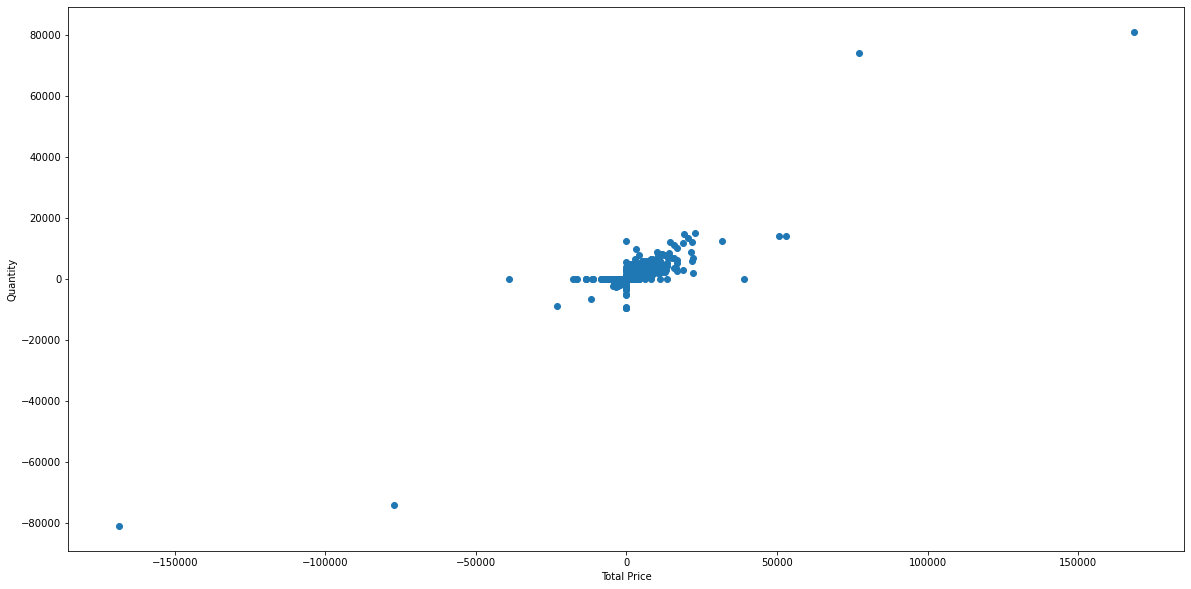

In [186]:
plt.figure(figsize=(20,10)) 
plt.scatter(Total_Price_Quantity_df['Total Price'],Total_Price_Quantity_df['Quantity'])
plt.xlabel('Total Price')
plt.ylabel('Quantity')